In [124]:
def Euler(f, g, l, r, h, y0, z0):
    x = np.linspace(l, l+h*int((r-l)/h), int((r-l)/h)+1)
    y = [y0]
    z = [z0]
    for i in range(len(x)-1):
        y.append(y[i] + h * f(x[i], y[i], z[i]))
        z.append(z[i] + h * g(x[i], y[i], z[i]))
    return x, y, z

In [125]:
def Runge_Romberg_error(y_2h, y_h, p):
    coef = 1 / (2**p - 1)
    return [coef * abs(y_h[2*i] - y_2h[i]) for i in range(len(y_2h))]

# Лабораторная работа 4
## Методы решения начальных и краевых задач для обыкновенных дифференциальных уравнений (ОДУ) и систем ОДУ

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, exp, log, tan, sqrt

### 4.1. Реализовать методы Эйлера, Рунге-Кутты и Адамса 4-го порядка в виде программ, задавая в качестве входных данных шаг сетки $h$. С использованием разработанного программного обеспечения решить задачу Коши для ОДУ 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением.

$y''-2tg(x)y'-3y=0$

$y(0)=1$

$y'(0)=3$

$x\in[0;1],\ \ \ h=0.1$

Точное решение в варианте: $y=cos^3(x)+sinx(1+2cos^2)(x) $

Точное решение по калькулятору: $y=\frac{\frac {1}{4} e^(-sqrt(2)x)(2+3sqrt(2))e^(2sqrt(2)x) + 2 - 3sqrt(2)} {cos(x)}$ 


In [162]:
def f(x, y, z):
    return 2 * tan(x) * z + 3 * y

def g(x, y, z):
    return z

def exact_solution(x):
    return 0.25 * exp(-sqrt(2) * x) * ((2 + 3 * sqrt(2)) * exp(2 * sqrt(2) * x) + 2 - 3 * sqrt(2)) / cos(x)

In [149]:
def euler_method(f, g, y1, z1, interval, h):
    l, r = interval
    x = [i for i in np.arange(l, r + h, h)]
    y = [y1]
    z = z1
    for i in range(len(x) - 1):
        z += h * f(x[i], y[i], z)
        y.append(y[i] + h * g(x[i], y[i], z))
    return x, y

In [150]:
def runge_kutta_method(f, g, y1, z1, interval, h, return_z=False):
    l, r = interval
    x = [i for i in np.arange(l, r + h, h)]
    y = [y1]
    z = [z1]
    for i in range(len(x) - 1):
        K1 = h * g(x[i], y[i], z[i])
        L1 = h * f(x[i], y[i], z[i])
        K2 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * K1, z[i] + 0.5 * L1)
        L2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * K1, z[i] + 0.5 * L1)
        K3 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * K2, z[i] + 0.5 * L2)
        L3 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * K2, z[i] + 0.5 * L2)
        K4 = h * g(x[i] + h, y[i] + K3, z[i] + L3)
        L4 = h * f(x[i] + h, y[i] + K3, z[i] + L3)
        delta_y = (K1 + 2 * K2 + 2 * K3 + K4) / 6
        delta_z = (L1 + 2 * L2 + 2 * L3 + L4) / 6
        y.append(y[i] + delta_y)
        z.append(z[i] + delta_z)

    if not return_z:
        return x, y
    else:
        return x, y, z

In [151]:
def adams_method(f, g, y1, z1, interval, h):
    x_runge, y_runge, z_runge = runge_kutta_method(f, g, y1, z1, interval, h, return_z=True)
    x = x_runge
    y = y_runge[:4]
    z = z_runge[:4]
    for i in range(3, len(x_runge) - 1):
        z_i = z[i] + h * (55 * f(x[i], y[i], z[i]) -
                          59 * f(x[i - 1], y[i - 1], z[i - 1]) +
                          37 * f(x[i - 2], y[i - 2], z[i - 2]) -
                          9 * f(x[i - 3], y[i - 3], z[i - 3])) / 24
        z.append(z_i)
        y_i = y[i] + h * (55 * g(x[i], y[i], z[i]) -
                          59 * g(x[i - 1], y[i - 1], z[i - 1]) +
                          37 * g(x[i - 2], y[i - 2], z[i - 2]) -
                          9 * g(x[i - 3], y[i - 3], z[i - 3])) / 24
        y.append(y_i)
    return x, y

In [152]:
def runge_rombert_method(h1, h2, y1, y2, p):
    assert h1 == h2 * 2
    norm = 0
    for i in range(len(y1)):
        norm += (y1[i] - y2[i * 2]) ** 2
    return norm ** 0.5 / (2**p + 1)

In [153]:
def mae(y1, y2):
    assert len(y1) == len(y2)
    res = 0
    for i in range(len(y1)):
        res += abs(y1[i] - y2[i])
    return res / len(y1)

In [154]:
y1 = 1  # y(0) = 1
dy1 = 3  # y'(0) = 3
interval = (0, 1)  # x in [0; 1]
h = 0.1

Mean absolute errors
Step = 0.1
euler: 0.07812580875250436
runge-kutta: 0.0002820390057994938
adams: 0.02361929533428347
Step = 0.05
euler: 0.03480209609041421
runge-kutta: 1.7495836703079482e-05
adams: 0.0024006268887105295

Runge-Romberg accuracy
euler: 0.08183690964830491
runge-kutta: 9.58282604755875e-05
adams: 0.008086838571025467


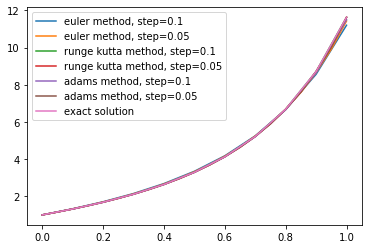

In [163]:
x_euler, y_euler = euler_method(f, g, y1, dy1, interval, h)
plt.plot(x_euler, y_euler, label=f'euler method, step={h}')
x_euler2, y_euler2 = euler_method(f, g, y1, dy1, interval, h/2)
plt.plot(x_euler2, y_euler2, label=f'euler method, step={h/2}')

x_runge, y_runge = runge_kutta_method(f, g, y1, dy1, interval, h)
plt.plot(x_runge, y_runge, label=f'runge kutta method, step={h}')
x_runge2, y_runge2 = runge_kutta_method(f, g, y1, dy1, interval, h/2)
plt.plot(x_runge2, y_runge2, label=f'runge kutta method, step={h/2}')

x_adams, y_adams = adams_method(f, g, y1, dy1, interval, h)
plt.plot(x_adams, y_adams, label=f'adams method, step={h}')
x_adams2, y_adams2 = adams_method(f, g, y1, dy1, interval, h/2)
plt.plot(x_adams2, y_adams2, label=f'adams method, step={h/2}')

x_exact = [i for i in np.arange(interval[0], interval[1] + h, h)]
x_exact2 = [i for i in np.arange(interval[0], interval[1] + h/2, h/2)]
y_exact = [exact_solution(x_i) for x_i in x_exact]
y_exact2 = [exact_solution(x_i) for x_i in x_exact2]
plt.plot(x_exact, y_exact, label='exact solution')

print('Mean absolute errors')
print(f'Step = {h}')
print('euler:', mae(y_euler, y_exact))
print('runge-kutta:', mae(y_runge, y_exact))
print('adams:', mae(y_adams, y_exact))
print(f'Step = {h/2}')
print('euler:', mae(y_euler2, y_exact2))
print('runge-kutta:', mae(y_runge2, y_exact2))
print('adams:', mae(y_adams2, y_exact2))
print()

print('Runge-Romberg accuracy')
print('euler:', runge_rombert_method(h, h/2, y_euler, y_euler2, 1))
print('runge-kutta:', runge_rombert_method(h, h/2, y_runge, y_runge2, 4))
print('adams:', runge_rombert_method(h, h/2, y_adams, y_adams2, 4))

plt.legend()
plt.show()

### 4.2. Реализовать метод стрельбы и конечно-разностный метод решения краевой задачи для ОДУ в виде программ. С использованием разработанного программного обеспечения решить краевую задачу для обыкновенного дифференциального уравнения 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 

$xy''+2y'-xy=0$

$y'(1)=0$

$1.5y(2)+y'(2)=e^2$

Точное решение: $y(x)=\frac{e^x}{x}$

In [38]:
f = lambda x,y,z: z
g = lambda x,y,z: y - 2 * z / x
y_exact = lambda x: exp(x) / x
h = 0.2
a, b = 1, 2
alpha, beta, y0 = 0, 1, 0
delta, gamma, y1 = 1.5, 1, exp(2)
EPS = 1e-9
px = lambda x: 2 / x
qx = lambda x: -1
fx = lambda x: 0

In [39]:
def shooting_method(f, g, a, b, h, alpha, beta, y0, delta, gamma, y1, eps=1e-4):
    def get_start_cond(eta):
        return (y0 - alpha * eta) / beta

    def get_eta_next(eta_prev, eta, sol_prev, sol):
        yb_prev = sol_prev[1][-1]
        zb_prev = sol_prev[2][-1]
        phi_prev = delta * yb_prev + gamma * zb_prev - y1
        yb = sol[1][-1]
        zb = sol[2][-1]
        phi = delta * yb + gamma * zb - y1
        return eta - (eta - eta_prev) / (phi - phi_prev) * phi

    eta_prev, eta = 1.0, 0.8
    while abs(eta-eta_prev) > eps:
        sol_prev = Euler(f, g, a, b, h, eta_prev, get_start_cond(eta_prev))
        sol      = Euler(f, g, a, b, h, eta,      get_start_cond(eta))
        eta_prev, eta = eta, get_eta_next(eta_prev, eta, sol_prev, sol)
    return sol

In [40]:
def tridiagonal_algo(A=None, alpha=None, beta=None, gamma=None, b=None):
    if not all([alpha, beta, gamma]) and A is not None:
        alpha = [0] + [A[i+1][i] for i in range(len(A)-1)]
        beta = [-A[i][i] for i in range(len(A))]
        gamma = [A[i][i+1] for i in range(len(A)-1)] + [0]
    P = [-gamma[0] / beta[0]]
    Q = [b[0] / beta[0]]
    for i in range(1, len(b)):
        P.append(-gamma[i] / (beta[i] + alpha[i] * P[i-1]))
        Q.append((b[i] - alpha[i] * Q[i-1]) / (beta[i] + alpha[i] * P[i-1]))
    x = [Q[-1]]
    for i in range(len(b)-2, -1, -1):
        x.append(P[i] * x[-1] + Q[i])
    return x[::-1]

In [41]:
def finite_difference_method(px, qx, fx, a, b, h, alpha, beta, y0, delta, gamma, y1):
    x = np.linspace(a, a+h*int((b-a)/h), int((b-a)/h)+1)
    d1 = [0]            + [1 - px(xi)*h/2 for xi in x[1:-1]]     + [-gamma]
    d2 = [h*alpha-beta] + [-2 + h**2 * qx(xi) for xi in x[1:-1]] + [h*delta+gamma]
    d3 = [beta]         + [1 + px(xi)*h/2 for xi in x[1:-1]]     + [0]
    d  = [h * y0]       + [h**2 * fx(xi) for xi in x[1:-1]]      + [h * y1]
    return x, tridiagonal_algo(alpha=d1, beta=d2, gamma=d3, b=d)

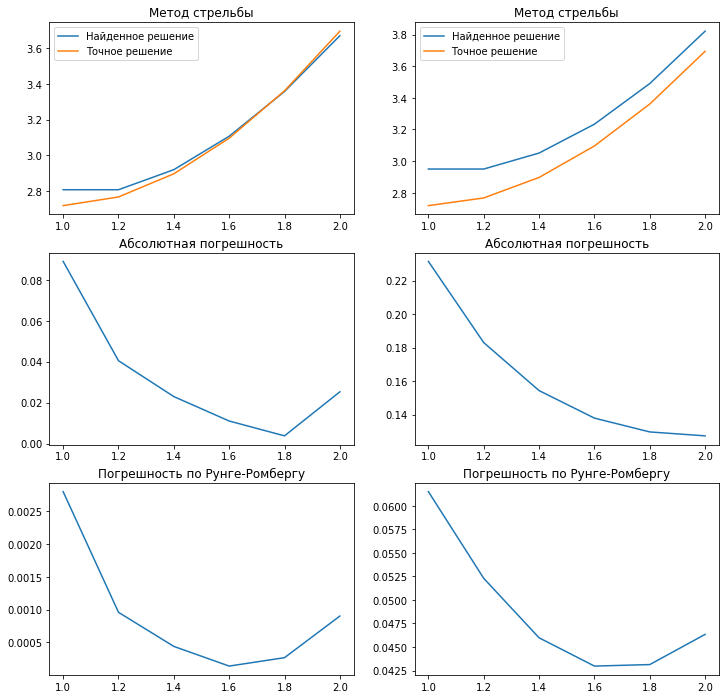

In [42]:
figure, axis = plt.subplots(3, 2, figsize=(12, 12))
x = np.linspace(a, a+h*int((b-a)/h), int((b-a)/h)+1)
exact_y = np.vectorize(y_exact)(x)

shoot_y = shooting_method(f, g, a, b, h, alpha, beta, y0, delta, gamma, y1, EPS)[1]
axis[0][0].set_title('Метод стрельбы')
axis[0][0].plot(x, shoot_y, label='Найденное решение')
axis[0][0].plot(x, exact_y, label='Точное решение')
axis[0][0].legend(loc='best')
axis[1][0].set_title('Абсолютная погрешность')
axis[1][0].plot(x, abs(exact_y-shoot_y))
axis[2][0].set_title('Погрешность по Рунге-Ромбергу')
axis[2][0].plot(x, Runge_Romberg_error(shoot_y, shooting_method(f, g, a, b, h/2, alpha, beta, y0, delta, gamma, y1, EPS)[1], 4))

findif_y = finite_difference_method(px, qx, fx, a, b, h, alpha, beta, y0, delta, gamma, y1)[1]
axis[0][1].set_title('Метод стрельбы')
axis[0][1].plot(x, findif_y, label='Найденное решение')
axis[0][1].plot(x, exact_y, label='Точное решение')
axis[0][1].legend(loc='best')
axis[1][1].set_title('Абсолютная погрешность')
axis[1][1].plot(x, abs(exact_y-findif_y))
axis[2][1].set_title('Погрешность по Рунге-Ромбергу')
axis[2][1].plot(x, Runge_Romberg_error(findif_y, shooting_method(f, g, a, b, h/2, alpha, beta, y0, delta, gamma, y1, EPS)[1], 2))